In [44]:
import numpy as np # numerical operations
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import pandas as pd # dataframe manipulation

sns.set(context='paper', style='ticks', font_scale=1)

## 1. English wowels and their formants

We are going to use the data on vowel formants from [here](https://www.phon.ucl.ac.uk/courses/pals0039/datasets.php). It contains data on English vowels produced by 44 speakers (31 female, 14 male) . The data is stored in the file `vowels.csv`.

### 1.1 Data & summary statistics

Let's start by reading the data:

In [87]:
vowels = pd.read_csv('https://raw.githubusercontent.com/alexeykosh/intro-to-ling/main/S3/vowels.csv')

Let's see how the data looks like:

In [88]:
vowels.head(10)

,SPEAKER,WORD,VOWEL,F1,F2,SEX,HEIGHT
0,S1,bad,æ,848.070,1450.960,male,173
1,S1,bard,ɑ,648.318,1126.220,male,173
2,S1,bead,i,259.000,1834.000,male,173
3,S1,bed,e,578.985,1715.220,male,173
4,S1,bid,ɪ,405.000,1899.000,male,173
5,S1,bird,ɜ,656.600,1414.400,male,173
6,S1,board,ɔ,360.034,988.693,male,173
7,S1,bod,ɒ,513.689,1023.000,male,173
8,S1,booed,u,277.000,1461.000,male,173
9,S1,bud,ʌ,592.313,1278.600,male,173


Let's count how many unique speakers are in the data:

In [47]:
vowels['SPEAKER'].drop_duplicates().shape

(44,)

Count the number of male and female speakers:

In [48]:
### YOUR CODE HERE ###

Plot it as a bar chart:

In [49]:
### YOUR CODE HERE ###

Plot a distribution of heights (note that each speaker produced multiple vowels).

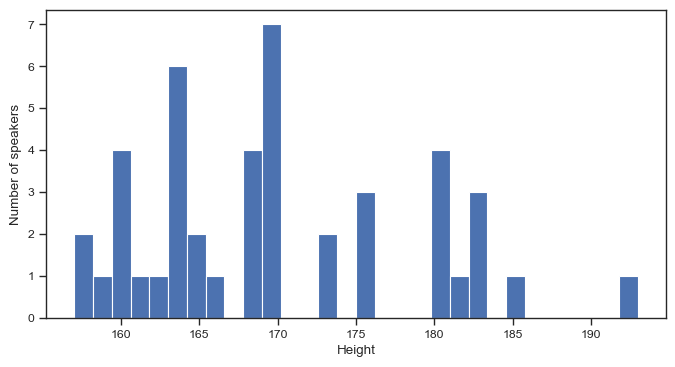

In [50]:
plt.figure(figsize=(8, 4))
plt.hist(vowels.drop_duplicates(subset='SPEAKER')['HEIGHT'], bins=30)
plt.xlabel('Height')
plt.ylabel('Number of speakers')
plt.show()

Can you do the same, but by gender? Hint: use subplots (you can read more about them [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)).

In [51]:
### YOUR CODE HERE ###

### 1.1. Representing the wovel space

Let's plot a scatter plot of the first two formants of the vowels. For now, we can plot all of the vowels in the same plot.

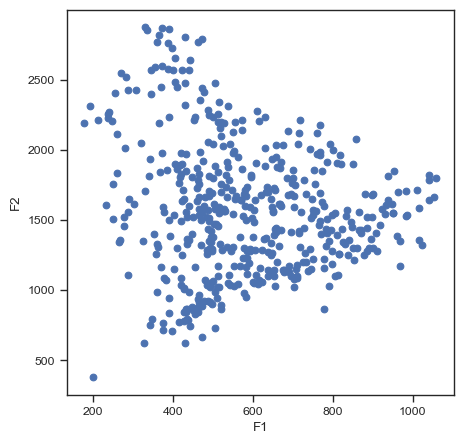

In [52]:
plt.figure(figsize=(5, 5)) # set the size of the plot
plt.scatter(vowels['F1'], vowels['F2']) # create a scatter plot
plt.xlabel('F1') # set the x-axis label
plt.ylabel('F2') # set the y-axis label
plt.show() # show the plot

That's a bit messy. First, we cannot distinguish the different vowels. We can fix that by plotting each vowel with unique color. 

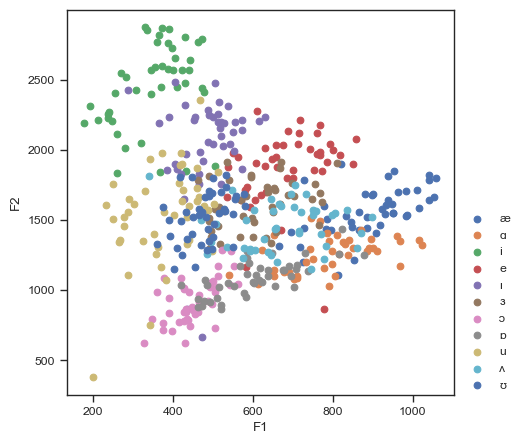

In [53]:
plt.figure(figsize=(5, 5)) # set the size of the plot
for vowel in vowels['VOWEL'].drop_duplicates(): # get unique vowels to serve as labels
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F1'], 
                vowels[vowels['VOWEL'] == vowel]['F2'], 
                label=vowel) # create a scatter plot
plt.xlabel('F1') # add labels
plt.ylabel('F2') # add labels
plt.legend(frameon=False, # removing the frame
           bbox_to_anchor=(1, 0.5)) # moving the legend to the outside
plt.show() # show the plot

Ok, there is a slight problem with colors overlapping, so we are going to fix that by using a different color map.

/var/folders/1c/pphtjl397rnbdcp94xmwzkqr0000gn/T/ipykernel_19043/194786655.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


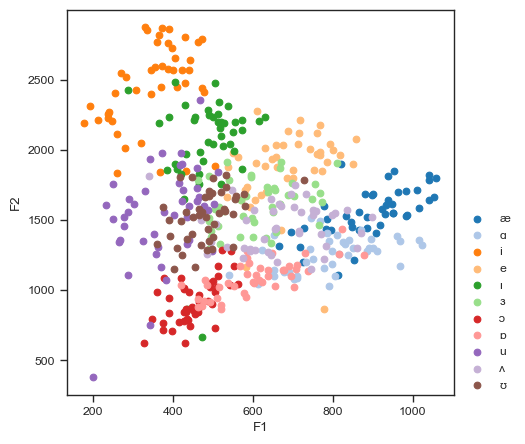

In [54]:
cmap = plt.cm.get_cmap('tab20')

plt.figure(figsize=(5, 5)) # set the size of the plot
for i, vowel in enumerate(vowels['VOWEL'].drop_duplicates()): # get unique speakers to serve as labels
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F1'], 
                vowels[vowels['VOWEL'] == vowel]['F2'], 
                label=vowel, c=[cmap(i / 20)]) # create a scatter plot
plt.xlabel('F1') # add labels
plt.ylabel('F2') # add labels
plt.legend(frameon=False, # removing the frame
           bbox_to_anchor=(1, 0.5)) # moving the legend to the outside
plt.show() # show the plot

What's wrong with the plot, compare it with the vowel chart below. What do you think is the problem?

**NB: the vowel chart below is for the California English dialect, but it should give you an idea of what the vowel space should look like.**

<!-- insert image from link -->

![vowel_chart](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/California_English_vowel_chart.svg/440px-California_English_vowel_chart.svg.png)

How can we change the chart to make it look more like the vowel chart? Pay attention to the axes and sounds like [i]. Hint: you can use invert axes by calling `plt.gca().invert_xaxis()` or `plt.gca().invert_yaxis()` for x and y axes respectively. We also probably would need to change the x and y axes data.

/var/folders/1c/pphtjl397rnbdcp94xmwzkqr0000gn/T/ipykernel_19043/2270495165.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


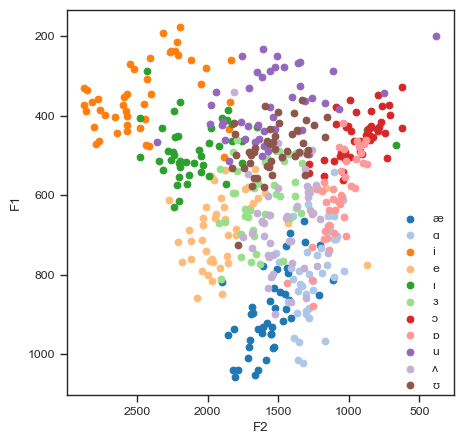

In [55]:
cmap = plt.cm.get_cmap('tab20')

plt.figure(figsize=(5, 5)) # set the size of the plot
for i, vowel in enumerate(vowels['VOWEL'].drop_duplicates()): # get unique speakers to serve as labels
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F2'], 
                vowels[vowels['VOWEL'] == vowel]['F1'], 
                label=vowel, c=[cmap(i / 20)]) # create a scatter plot
plt.xlabel('F2') # add labels
plt.ylabel('F1') # add labels
plt.gca().invert_yaxis() # invert the y-axis
plt.gca().invert_xaxis() # invert the x-axis
plt.legend(frameon=False, # removing the frame
           bbox_to_anchor=(1, 0.5)) # moving the legend to the outside
plt.show() # show the plot

This is a representation of how every individual speaker produces the vowels, but we can also represent the average formants for each vowel (by modifying the previous plot to compute average formants per formant). Let's do that. Note that you could use the pandas .mean() method to compute the average formant frequencies.

In [56]:
### YOUR CODE HERE ###

Finally, we can jusrt make everything look nicer by positioning the axes on the top and right sides, and using the seaborn [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function.

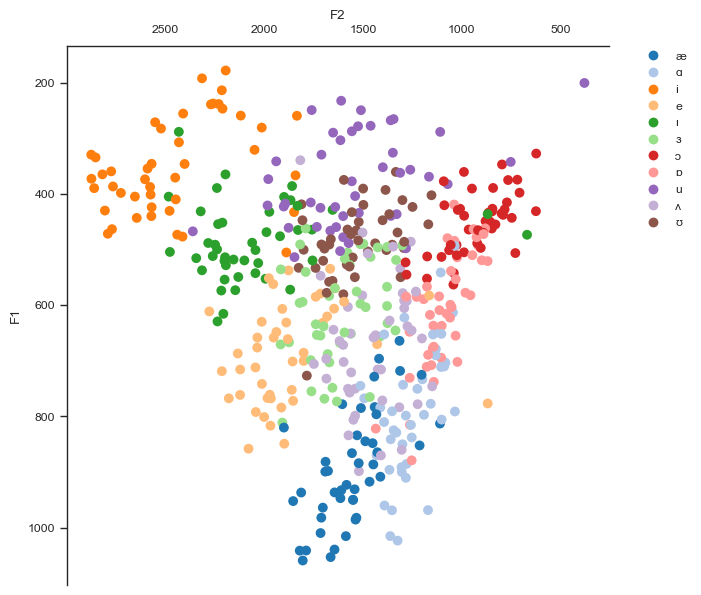

In [57]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=vowels, 
                x='F2', y='F1', 
                hue='VOWEL', 
                palette='tab20',
                s=50,
                linewidth=0)
# reverse the y-axis
plt.gca().invert_yaxis()
# reverse the x-axis
plt.gca().invert_xaxis()
# put x axis on top 
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0., 
           frameon=False)
sns.despine(bottom=True, right=True, top=False, left=False) # let's remove the splines without ticks
# remove bottom and right spines
plt.show()

You can improve this plot by using different shapes for males and females, for that you can use the `style` parameter in the scatterplot function.

In [58]:
### YOUR CODE HERE ###

You can also make the size proportional to the height of the speaker. You can do that by using the `size` parameter in the scatterplot function. NB: that you can scale the size by adding the `sizes' parameter, which should be an interval like (20, 100) -- you should experiment with that. 

In [59]:
### YOUR CODE HERE ###

### 1.3. Predicting the wovel from the formants

In [60]:
from sklearn.preprocessing import StandardScaler # scale the data
from sklearn.model_selection import train_test_split # split the data into training and testing sets
from sklearn.metrics import accuracy_score # calculate accuracy
from sklearn.ensemble import RandomForestClassifier # random forest classifier

First, we need to split the data into the predictors (x) and the target (y). The predictors are the formants, and the target is the vowel label.

In [61]:
x = vowels[['F1', 'F2']]
y = vowels['VOWEL']

Then we need to scale the data, so that the formants on the same scale. We can do it by subtracting the mean and dividing by the standard deviation. That way, for each formant (F1 or F2), their value would correspond the difference in number of standard deviations from the mean. Let's write the formula below as a function.

$\text{standard score}(x) = \frac{x - \mu}{\sigma}$

In [62]:
def scaler(x):
    return (x - x.mean()) / x.std()

Then apply it to each row in the x data. We can use the pandas `apply` method for that (you can read more about it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)).

In [63]:
x_scaled = x.apply(scaler, axis=0)

Let's check the data:

In [64]:
x_scaled.head(10)

,F1,F2
0,1.437650,-0.265693
1,0.361257,-0.955811
2,-1.736640,0.548321
3,-0.012354,0.295897
4,-0.949898,0.686455
5,0.405886,-0.343388
6,-1.192204,-1.248076
7,-0.364211,-1.175168
8,-1.639645,-0.244357
9,0.059466,-0.631982


What should be the mean of the each transformed formant?

In [65]:
### YOUR CODE HERE ###

Ok, now let's split the transformed data into training and testing sets. We can use 80% of the data for training and 20% for testing. We can also set the random state, so that our results are reproducible. You can read more about this here: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.2, 
                                                    random_state=42)

We want to classify vowels, so we have multiple classes. You are probably familiar with binary classification, but we can also classify multiple classes. You can read more about it [here](https://scikit-learn.org/stable/modules/multiclass.html). Today, we will be using the random forest classifier, which is essentially an ensemble of decision trees. You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). We start by initializing the model with the default parameters.

In [67]:
# train a logistic regression model
model = RandomForestClassifier()

We need to fit the model first. Then we can predict the vowels for the test data.

In [68]:
model.fit(x_train, y_train)

RandomForestClassifier()

We can first start by checking the accuracy (i.e. how many times the model predicted the correct vowel). We can do it by comparing the predicted vowels with the true vowels.

In [69]:
y_pred_train = model.predict(x_train)

Let's look at the accuracy of the model on the training data:

In [70]:
accuracy_score(y_train, y_pred_train)

1.0

Let's try to predict the vowels for the test data. Test data is different, because the model hasn't seen it before. What do you think the accuracy will be? 

You will first need to predict the vowels for the test data and then calculate the accuracy.

In [71]:
y_pred = model.predict(x_test)

In [72]:
print(accuracy_score(y_test, y_pred))

0.5360824742268041


### 1.4. Predicting the wovel from the formants and the gender of the speaker

We need to convert the gender into binary machine readable features. For this, we can use pandas .map() method. You can read more about it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html).

In [73]:
vowels['SEX_b'] = vowels['SEX'].map({'male': 0, 'female': 1})

Let's do the same thing again with scaling the data, splitting the data into training and testing sets, and fitting the model.

In [74]:
# predictors and target variable
x = vowels[['F1', 'F2']]
x_gender = vowels[['SEX_b']]
y = vowels['VOWEL']

# scale formants
x_scaled = x.apply(scaler, axis=0)

# add the binary variable back
x_all = np.concatenate([vowels[['SEX_b']], x_scaled], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_all, y,
                                                    test_size=0.2, 
                                                    random_state=42)

Let's fit the model again:

In [75]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

Let's start by evaluating the performance on testing set directly:

In [81]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.711340206185567


The accuracy improved! Why do you think that is?

### 1.5. Predicting the wovel from the formants, gender and heigt of the speaker.

Finally, we can try to predict the vowels from the information about (a) formants, (b) gender and (c) height of the speaker. What would you need to standardize? Only the formants, or height as well? Create the preprocessed training and testing data:

In [82]:
### YOUR CODE HERE ###

Then fit the model again:

In [83]:
### YOUR CODE HERE ###

And finally, evaluate the model. Did the accuracy improve? What does it tell us. 

In [86]:
### YOUR CODE HERE ###